# Import Libraries

In [174]:
#Suppress Warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from matplotlib.pyplot import savefig
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import *

%matplotlib inline
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

# Import Data

In [175]:
#Import Data using Pandas
df = pd.read_csv("FinalFullCelticsData.csv")
df.head()

,Unnamed: 0,season_id,game_id,game_date,team_id,team_abbreviation,matchup,wl_x,fgm,fga,...,elo1_pre,elo2_pre,elo1_post,elo2_post,raptor1_pre,raptor2_pre,score1,score2,quality,wl_y
0,236,22018,21800001,2018-10-16,1610612738,BOS,BOS @ PHI,1,42.0,97.0,...,1561.524193,1607.057688,1573.849372,1594.732509,1633.000000,1617.000000,105.0,87.0,90,1.0
1,41,22018,21800019,2018-10-19,1610612738,BOS,BOS @ TOR,0,40.0,99.0,...,1573.849372,1583.693415,1566.426450,1591.116337,1638.194302,1650.738829,101.0,113.0,93,0.0
2,42,22018,21800028,2018-10-20,1610612738,BOS,BOS @ NYK,1,33.0,82.0,...,1566.426450,1416.078229,1570.402809,1412.101870,1629.249779,1324.092286,103.0,101.0,34,1.0
3,237,22018,21800040,2018-10-22,1610612738,BOS,BOS @ ORL,0,37.0,91.0,...,1570.402809,1361.192831,1557.690507,1373.905133,1619.735071,1418.917713,90.0,93.0,56,0.0
4,43,22018,21800065,2018-10-25,1610612738,BOS,BOS @ OKC,1,33.0,86.0,...,1557.690507,1543.602601,1568.006304,1533.286804,1615.158050,1620.939695,101.0,95.0,89,1.0


# Data Visualization

In [176]:
#Data Visualization
df2 = df.drop(columns = ['wl_x'])
df2.rename(columns={'wl_y':'wl'}, inplace=True)

1    184
0    124
Name: wl_x, dtype: int64

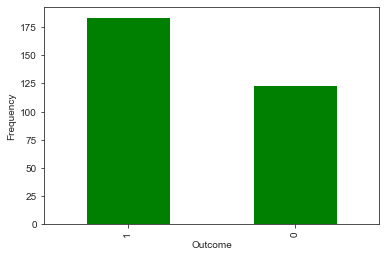

In [177]:
# Count of Wins and Losses
fig, ax = plt.subplots()
df['wl_x'].value_counts().plot(ax=ax, kind='bar', xlabel='Outcome', ylabel='Frequency', color = 'g')
df['wl_x'].value_counts()

<AxesSubplot:xlabel='reb', ylabel='Count'>

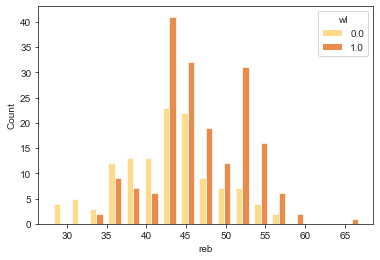

In [178]:
#Histogram of Rebounds based off Wins/Losses
sns.histplot(data = df2, x = 'reb', hue = 'wl', multiple = 'dodge', palette = 'YlOrBr', shrink = 0.7)

<AxesSubplot:xlabel='pf', ylabel='Count'>

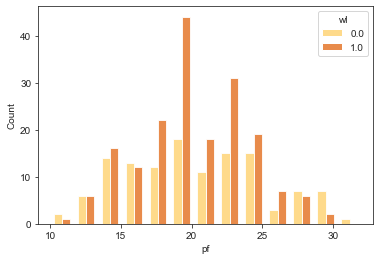

In [179]:
#Histogram of Personal Fouls based off Wins/Losses
sns.histplot(data = df2, x = 'pf', hue = 'wl', multiple = 'dodge', palette = 'YlOrBr', shrink = 0.7)

<AxesSubplot:xlabel='pts', ylabel='Count'>

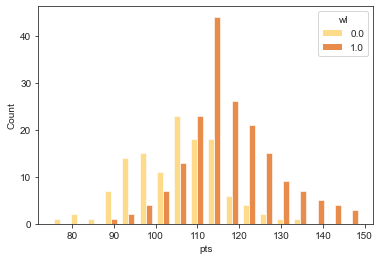

In [180]:
#Histogram of Points Based Off Wins/Losses
sns.histplot(data = df2, x = 'pts', hue = 'wl', multiple = 'dodge', palette = 'YlOrBr', shrink = 0.7)

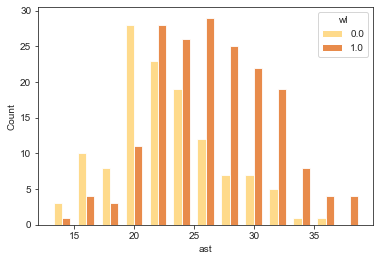

In [181]:
#Histogram of Assists Based Off Wins/Losses
sns.histplot(data = df2, x = 'ast', hue = 'wl', multiple = 'dodge', palette = 'YlOrBr', shrink = 0.7)
sns.set_style('ticks')

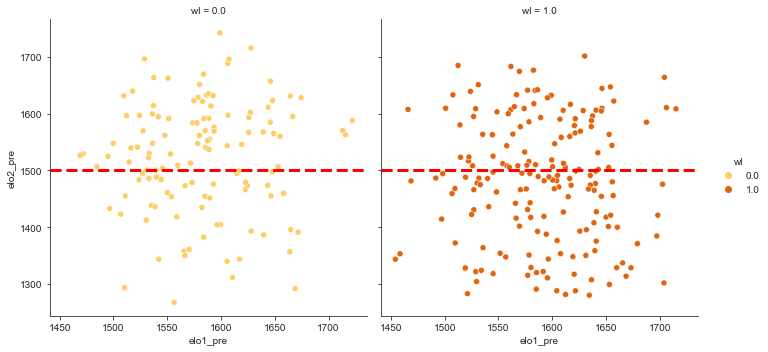

In [182]:
# Scatterplot of Wins and Losses Based Off Opponent Strength
scatter = sns.relplot(
    data=df2, x="elo1_pre", y="elo2_pre",
    col="wl",
    hue = 'wl',
    palette = 'YlOrBr',
    kind="scatter",
)
scatter.refline(y = 1500,
          color = "red",
          lw = 3)

<AxesSubplot:xlabel='quality', ylabel='Count'>

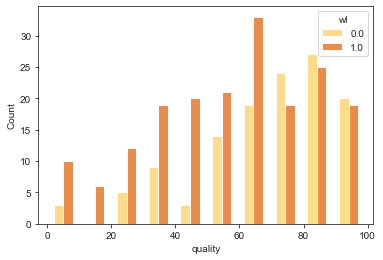

In [183]:
#Histogram of Quality based off Wins/Losses
sns.histplot(data = df2, x = 'quality', hue = 'wl', multiple = 'dodge', palette = 'YlOrBr', shrink = 0.6)

# PCA

In [184]:
# Dropping Irrelevant Columns
newdf = df.drop(columns = ['Unnamed: 0', 'game_date', 
                           'season_id','game_id', 'team_id', 
                           'team_abbreviation', 'matchup', 'wl_y',
                           'wl_x','plus_minus','elo1_post','elo2_post',
                           'date','score1','score2','season','team'])
newdf.head()

,fgm,fga,fg_pct,fg3m,fg3a,fg3_pct,ftm,fta,ft_pct,oreb,...,stl,blk,tov,pf,pts,elo1_pre,elo2_pre,raptor1_pre,raptor2_pre,quality
0,42.0,97.0,0.433,11.0,37.0,0.297,10.0,14.0,0.714,12.0,...,7.0,5.0,15.0,20.0,105,1561.524193,1607.057688,1633.000000,1617.000000,90
1,40.0,99.0,0.404,14.0,36.0,0.389,7.0,10.0,0.700,16.0,...,4.0,6.0,16.0,27.0,101,1573.849372,1583.693415,1638.194302,1650.738829,93
2,33.0,82.0,0.402,9.0,25.0,0.360,28.0,33.0,0.848,11.0,...,8.0,2.0,15.0,26.0,103,1566.426450,1416.078229,1629.249779,1324.092286,34
3,37.0,91.0,0.407,9.0,40.0,0.225,7.0,9.0,0.778,9.0,...,6.0,3.0,12.0,15.0,90,1570.402809,1361.192831,1619.735071,1418.917713,56
4,33.0,86.0,0.384,11.0,32.0,0.344,24.0,33.0,0.727,10.0,...,7.0,1.0,12.0,27.0,101,1557.690507,1543.602601,1615.158050,1620.939695,89


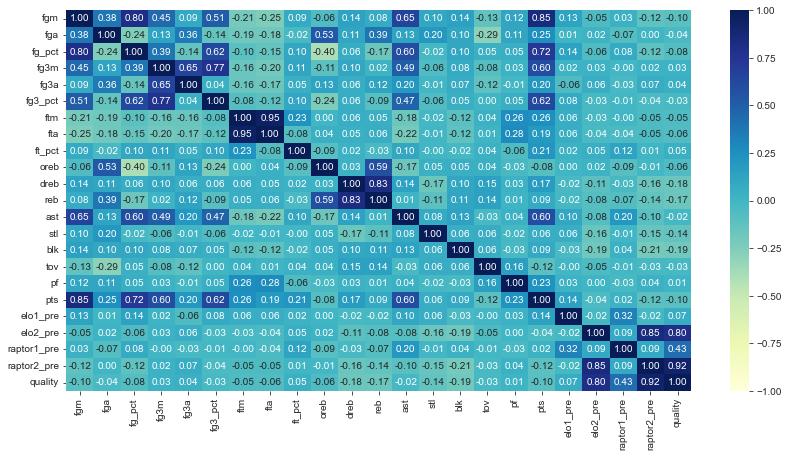

In [185]:
#Correlation Matrix
plt.figure(figsize=(14,7))
sns.heatmap(newdf.corr(), annot=True, fmt=".2f",vmin=-1,vmax=1, cmap='YlGnBu');

In [186]:
#PCA w/o Scaled Data
pca = PCA(n_components = 10)
pca.fit(newdf)
pcaSummary_df = pd.DataFrame({
            '% of variance explained': pca.explained_variance_ratio_,
            'Cumulative % explained': np.cumsum(pca.explained_variance_ratio_)
             })
pcaSummary_df.round(3)

,% of variance explained,Cumulative % explained
0,0.743,0.743
1,0.124,0.866
2,0.061,0.928
3,0.057,0.985
4,0.006,0.991
5,0.003,0.993
6,0.002,0.995
7,0.001,0.997
8,0.001,0.998
9,0.001,0.998


In [187]:
#Convert the PCA componenets into a data frame and finding the variance
pca_df = pd.DataFrame(pca.components_).round(2).transpose()
var = list(newdf.columns)
pca_df.index = [var]

In [188]:
#Scale Data with StandardScaler
scaledArray = preprocessing.scale(newdf)
scaled_df = pd.DataFrame(scaledArray)

In [189]:
#PCA with Scaled Data
newPca = PCA(n_components=9)
newPca.fit(scaled_df)

# view the importance of principal components
pcaSummary_df = pd.DataFrame({
            'Proportion of variance': newPca.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(newPca.explained_variance_ratio_)
            })
pcaSummary_df.round(3)

,Proportion of variance,Cumulative proportion
0,0.191,0.191
1,0.133,0.324
2,0.111,0.435
3,0.098,0.532
4,0.069,0.601
5,0.063,0.664
6,0.052,0.717
7,0.047,0.764
8,0.044,0.808


In [190]:
pd.DataFrame(newPca.components_.transpose(), index=[var]).round(2)

,0,1,2,3,4,5,6,7,8
fgm,0.42,-0.01,0.06,0.02,0.07,-0.17,0.27,-0.14,-0.12
fga,0.08,0.12,0.46,0.11,0.34,-0.15,0.13,-0.06,-0.08
fg_pct,0.38,-0.08,-0.23,-0.05,-0.15,-0.08,0.21,-0.10,-0.07
fg3m,0.36,-0.10,0.13,0.03,0.05,0.33,-0.26,0.18,0.19
fg3a,0.13,-0.03,0.34,0.04,0.21,0.30,-0.40,0.26,0.20
fg3_pct,0.36,-0.10,-0.12,0.01,-0.09,0.20,-0.01,0.03,0.08
ftm,-0.08,0.10,-0.31,0.51,0.15,0.06,-0.16,-0.02,-0.10
fta,-0.11,0.12,-0.30,0.49,0.17,0.07,-0.02,-0.04,0.13
ft_pct,0.08,-0.06,-0.07,0.10,-0.02,-0.04,-0.46,0.04,-0.72
oreb,-0.10,0.18,0.38,0.18,0.11,-0.14,0.08,0.04,-0.05


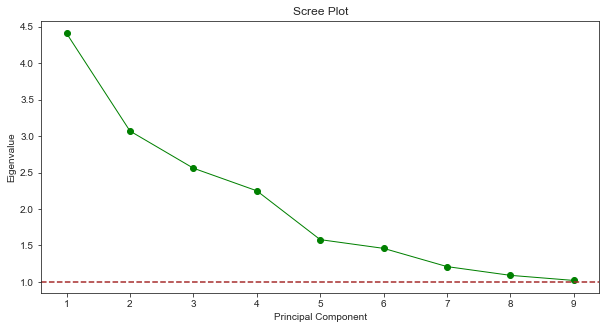

In [191]:
#Scree Plot of Eigenvalues vs. Principal Components
eig_values = newPca.explained_variance_.round(2)
xvals = np.arange(1,10,step=1);

plt.figure(figsize=(10,5))
plt.plot(xvals, eig_values, color='green', marker='o', linewidth=1)
plt.xticks(xvals)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='brown', linestyle='--')

In [192]:
#Producing DataFrame of Principal Components
newPca.fit(scaled_df)
principalComponents = newPca.fit_transform(scaled_df)
principalDF = pd.DataFrame(
        principalComponents.round(3), 
        columns = ['Scoring','OpponentStrength','SecondChance',
                   'FreeThrows','DefensiveRebounding','CelticStrength', 
                   'PerimeterShooting','Turnovers','FreeThrowEfficiency']
        )

# Logistic Regression

In [193]:
#Performing Logistic Regression
df['wl_x'] = df['wl_x'].astype('category')
X_logistic = principalDF
y_logistic = df['wl_x']
X_logistic_train, X_logistic_test, y_logistic_train, y_logistic_test = train_test_split(X_logistic, y_logistic, test_size = 0.3, random_state = 1, stratify = y_logistic)

lr = LogisticRegression()
lr.fit(X_logistic_train, y_logistic_train)
y_logistic_pred = lr.predict(X_logistic_test)

<AxesSubplot:>

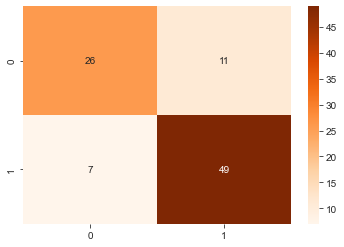

In [194]:
#Confusion Matrix of Logistic Regression
conf_matrix_log = confusion_matrix(y_logistic_test ,y_logistic_pred)
sns.heatmap(conf_matrix_log, annot= True, cmap = 'Oranges')

In [195]:
#Accuracy Score w/o CV
print(accuracy_score(y_logistic_test, y_logistic_pred))

#Accuracy Score of Logistic Regression with CV=10
print(cross_val_score(lr, X_logistic_train, y_logistic_train, cv = 5, scoring = "accuracy").mean())

0.8064516129032258
0.8186046511627907


In [196]:
#Performing GridSearch
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  
    'solver': ['lbfgs', 'newton-cg', 'liblinear']
}

grid_search = GridSearchCV(lr, param_grid, cv = 10, scoring = 'accuracy')

#Fit the grid search to the data
grid_search.fit(X_logistic_train, y_logistic_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best score found: ", grid_search.best_score_)

# Use the best estimator to make predictions
lr_best_model = grid_search.best_estimator_

Best parameters found:  {'C': 0.23357214690901212, 'penalty': 'l1', 'solver': 'liblinear'}
Best score found:  0.8510822510822511


In [197]:
#Reading in '23 Celtics Season to Predict Wins/Losses
celt23 = pd.read_csv("AllGameCeltic23.csv")

#Cleaning the dataset for PCA
newCelt23 = celt23.drop(columns = ['game_date', 'season_id', 'team_id', 'team_abbreviation', 
                                   'team_name', 'matchup', 'wl', 'team1', 'team2', 
                                   'plus_minus','score1', 'score2', 'importance', 
                                   'total_rating','elo1_post', 'elo2_post'])

In [198]:
#Scaled Data for PCA
scaledCelt23 = preprocessing.scale(newCelt23)
scaled_df23 = pd.DataFrame(scaledCelt23)

In [199]:
# PCA for Season 23 
newPca23 = PCA(n_components = 9)
newPca23.fit(scaled_df23)

# view the importance of principal components
pcaSummary_df = pd.DataFrame({
            'Proportion of variance': newPca23.explained_variance_ratio_,
            'Cumulative proportion': np.cumsum(newPca23.explained_variance_ratio_)
            })
pcaSummary_df.transpose().round(3)

,0,1,2,3,4,5,6,7,8
Proportion of variance,0.234,0.143,0.126,0.093,0.068,0.060,0.049,0.045,0.036
Cumulative proportion,0.234,0.377,0.503,0.597,0.665,0.725,0.774,0.818,0.854


In [200]:
pd.DataFrame(newPca23.components_.transpose(), index=[var]).round(2)

,0,1,2,3,4,5,6,7,8
fgm,-0.38,0.05,-0.12,0.15,0.07,0.00,0.02,0.28,-0.05
fga,-0.31,-0.23,-0.12,-0.13,0.15,-0.08,-0.14,0.11,0.05
fg_pct,-0.23,0.27,-0.06,0.34,-0.04,0.10,0.16,0.24,-0.13
fg3m,-0.34,0.23,0.06,-0.04,-0.03,-0.02,0.01,-0.29,0.14
fg3a,-0.30,-0.05,0.09,-0.23,0.04,-0.08,-0.24,-0.28,0.31
fg3_pct,-0.22,0.34,-0.00,0.15,-0.07,0.04,0.21,-0.18,-0.07
ftm,0.07,-0.36,-0.04,0.41,-0.16,-0.21,0.03,-0.21,0.10
fta,0.07,-0.38,-0.09,0.36,-0.15,-0.17,-0.13,-0.11,0.03
ft_pct,0.06,0.01,0.18,0.22,-0.02,-0.20,0.57,-0.31,0.26
oreb,-0.10,-0.22,-0.12,-0.27,0.13,-0.37,0.33,-0.03,-0.35


In [201]:
#Building DataFrame for Newly Named PCs
newPca23.fit(scaled_df23)
principalComponents = newPca23.fit_transform(scaled_df23)
principalDF23 = pd.DataFrame(
        principalComponents.round(3), 
        columns = ['Scoring', 'OpponentStrength', 'SecondChance',
                   'FreeThrows', 'DefensiveRebounding', 'CelticStrength', 
                   'PerimeterShooting', 'Turnovers', 'FreeThrowEfficiency']
        )

principalDF23

,Scoring,OpponentStrength,SecondChance,FreeThrows,DefensiveRebounding,CelticStrength,PerimeterShooting,Turnovers,FreeThrowEfficiency
0,1.232,0.978,-1.577,3.166,0.668,-0.505,-1.196,0.990,-0.037
1,2.047,0.702,-1.252,1.277,0.939,2.215,3.192,-0.281,-0.488
2,-0.728,-0.494,3.413,1.448,-0.239,-0.161,-1.014,-0.100,0.899
3,0.251,-0.237,0.927,-1.794,1.755,0.367,-0.315,-0.413,0.942
4,1.046,-0.121,-0.346,4.008,1.015,0.091,-1.212,-0.580,-1.335
...,...,...,...,...,...,...,...,...,...
77,-0.946,-1.117,2.971,-0.262,0.950,-1.590,0.100,-0.616,0.932
78,1.370,1.459,-1.584,-2.222,1.250,-0.734,-1.506,0.474,0.529
79,1.882,-0.348,-1.710,-3.172,-0.311,1.414,-1.009,0.579,-1.549
80,-1.339,0.147,-1.998,-0.887,-0.400,1.099,1.386,-0.654,-1.399


In [202]:
#Accuracy Score for Logistic Regression on Season 23
logistic_grid_search_pred = lr_best_model.predict(principalDF23)
accuracy_score(logistic_grid_search_pred, celt23['wl'])

0.4634146341463415

In [203]:
#Summary Statistics for Logistic Regression
lr_intercept = lr.intercept_[0]
lr_coef = lr.coef_[0]

# print coefficients
print('intercept ', lr_intercept)
print(pd.DataFrame({'coeff': lr_coef}, index=principalDF23.columns))

intercept  0.9487396261943412
                        coeff
Scoring              1.009688
OpponentStrength     0.453344
SecondChance        -0.055627
FreeThrows           0.560414
DefensiveRebounding -0.735200
CelticStrength      -0.119067
PerimeterShooting   -0.054482
Turnovers           -0.519635
FreeThrowEfficiency -0.317685


# KNN

In [204]:
#Splitting data for KNN 
X_knn = principalDF
y_knn = df['wl_x']
X_knn_train, X_knn_test, y_knn_train, y_knn_test = train_test_split(X_knn, y_knn, test_size = 0.3, random_state = 1, stratify = y_knn)

#Examine the shape for each set
print('Training set:', X_knn_train.shape, 'Testing set:', X_knn_test.shape)

Training set: (215, 9) Testing set: (93, 9)


In [205]:
#Performing KNN w/o Hypertuning
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_knn_train, y_knn_train)
y_knn_pred = knn.predict(X_knn_test)

#Accuracy Score of KNN w/o CV
accuracy_score(y_knn_test, y_knn_pred)

0.6881720430107527

In [206]:
# k-NN with hypertunning 
grid_params = { 
    'n_neighbors' : [1,2,3,4,5,6,7,8,9,10],
    'weights' : ['uniform','distance'],
    'metric' : ['minkowski','euclidean','manhattan']}
knn_grid_search = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
g_res = knn_grid_search.fit(X_knn_train, y_knn_train)

# Get the hyperparameters with the best score
print(g_res.best_params_)
print(g_res.best_score_)

Fitting 10 folds for each of 60 candidates, totalling 600 fits
{'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
0.8045454545454545


In [207]:
#Accuracy Score for KNN on Season 23
knn_best_model = g_res.best_estimator_
knn_grid_search_pred = knn_best_model.predict(principalDF23)
accuracy_score(knn_grid_search_pred, celt23['wl'])

0.4878048780487805

# Decision Tree (Full + Pruned)

In [208]:
#Decision Tree
X_decisionTree = newdf
y_decisionTree = df['wl_x']
X_decisionTree_train, X_decisionTree_test, y_decisionTree_train, y_decisionTree_test = train_test_split(X_decisionTree, y_decisionTree, test_size = 0.3, random_state = 1, stratify = y_decisionTree)

In [209]:
#Full Tree Construction
full_clf = DecisionTreeClassifier(random_state = 1)
full_clf.fit(X_decisionTree_train, y_decisionTree_train)

print('Number of nodes', full_clf.tree_.node_count)
print('# of Leaves', full_clf.tree_.n_leaves)
print('Max Depth', full_clf.tree_.max_depth)

Number of nodes 63
# of Leaves 32
Max Depth 9


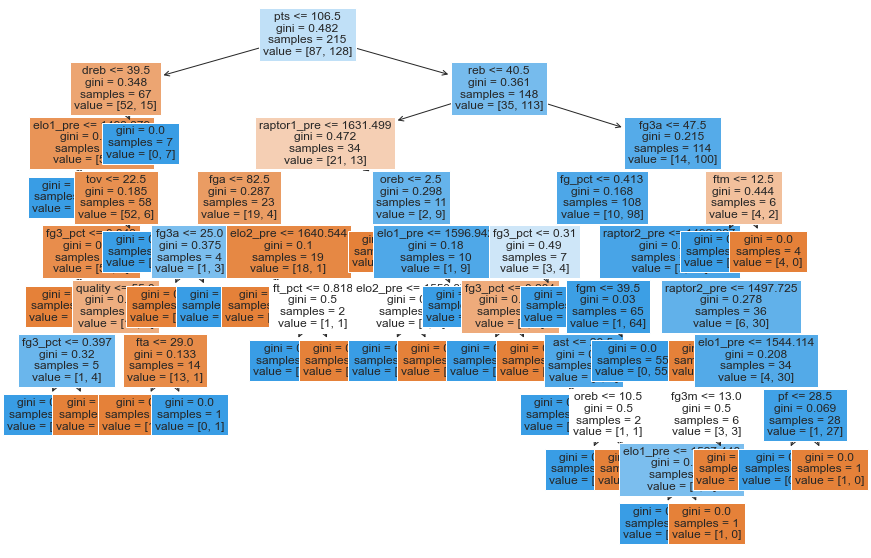

In [210]:
#Visualize Full Tree
plt.figure(figsize = (15,10))
tree.plot_tree(full_clf, fontsize = 12, feature_names = X_decisionTree.columns, filled=True);

In [211]:
#Full Tree Accuracy Score w/o CV
y_fullclf_pred = full_clf.predict(X_decisionTree_test)
fullclf_score = accuracy_score(y_decisionTree_test, y_fullclf_pred)
fullclf_score

0.7204301075268817

In [212]:
#Accuracy Score of Full Tree with CV=10
full_accuracy_scores = cross_val_score(full_clf, X_decisionTree_train, y_decisionTree_train, cv=10)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in full_accuracy_scores])
print('10-fold cross-validation mean accuracy:', round(full_accuracy_scores.mean(),4))

Accuracy scores of each fold:  ['0.773', '0.591', '0.727', '0.727', '0.591', '0.619', '0.524', '0.667', '0.810', '0.667']
10-fold cross-validation mean accuracy: 0.6695


In [213]:
#Grid Search
param_grid = {
    'max_depth': [6, 9, 12, 15],
    'splitter': ['random', 'best'],
    'criterion': ['entropy'],
    'min_samples_split' : [15, 20, 25, 30],
    'min_impurity_decrease': [0.001, 0.005, 0.01], 
    'random_state': [1]
}

tree_gridSearch = GridSearchCV(full_clf, param_grid, cv = 10, scoring = 'accuracy')
tree_gridSearch.fit(X_decisionTree_train, y_decisionTree_train)

print('Best accuracy: ', tree_gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', tree_gridSearch.best_params_)

Best accuracy:  0.7777056277056277
Parameter values to achieve best accuracy:  {'criterion': 'entropy', 'max_depth': 6, 'min_impurity_decrease': 0.001, 'min_samples_split': 25, 'random_state': 1, 'splitter': 'random'}


In [214]:
clf_best_model = tree_gridSearch.best_estimator_
clf_grid_search_pred = clf_best_model.predict(newCelt23)
accuracy_score(clf_grid_search_pred, celt23['wl'])

0.7926829268292683

In [215]:
#Hypertuned tree(pruned tree)
clf_best_model.fit(X_decisionTree_train, y_decisionTree_train)

#Pruned Tree Construction
print('Number of nodes', clf_best_model.tree_.node_count)
print('Max Depth', clf_best_model.tree_.max_depth)
print('# of Leaves', clf_best_model.tree_.n_leaves)

Number of nodes 25
Max Depth 6
# of Leaves 13


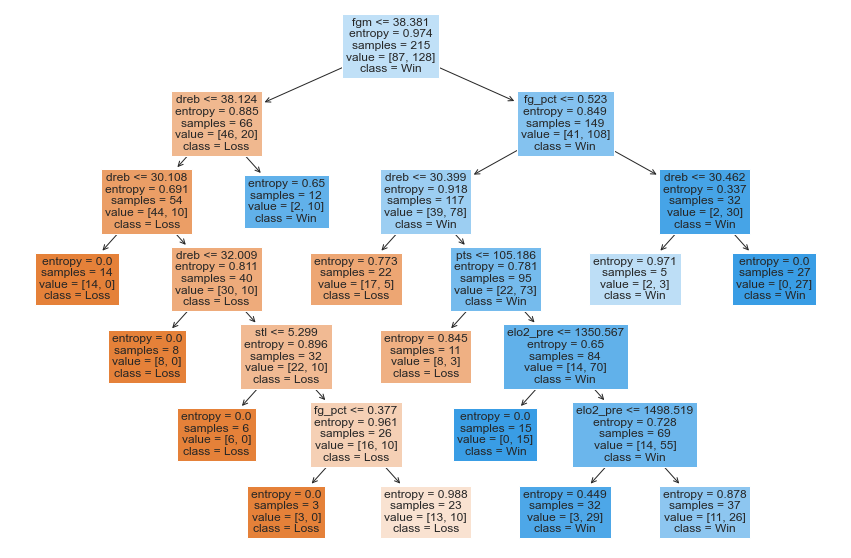

In [216]:
#Pruned Tree Visualization
fig = plt.figure(figsize=(15,10))

# Define Class Names
cnames = ['Loss', 'Win'] 
tree.plot_tree(clf_best_model, fontsize = 12, class_names = cnames, feature_names = X_decisionTree.columns, filled = True);

In [217]:
#Accuracy Score of Pruned Tree w/o CV
y_pruned_pred = clf_best_model.predict(X_decisionTree_test)
print(accuracy_score(y_decisionTree_test, y_pruned_pred))

#Accuracy Score of Pruned Tree with CV=10
pruned_accuracy_scores = cross_val_score(clf_best_model, X_decisionTree_train, y_decisionTree_train, cv = 10)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in pruned_accuracy_scores])
print('10-fold cross-validation mean accuracy:', round(pruned_accuracy_scores.mean(), 4))

0.6881720430107527
Accuracy scores of each fold:  ['0.727', '0.818', '0.818', '0.727', '0.591', '0.810', '0.905', '0.714', '0.857', '0.810']
10-fold cross-validation mean accuracy: 0.7777


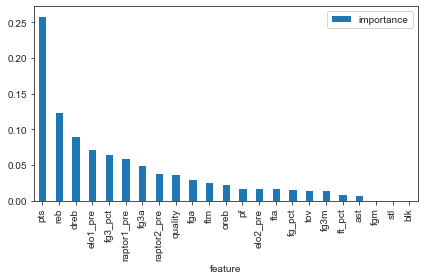

In [218]:
#Feature Importance for Full Tree
fullimportances = full_clf.feature_importances_
full_feature_importances= pd.DataFrame({'feature': X_decisionTree_train.columns, 'importance': fullimportances})
full_feature_importances = full_feature_importances.sort_values('importance', ascending = False)
ax = full_feature_importances.plot(kind = 'bar', x = 'feature')

plt.tight_layout()
plt.show()

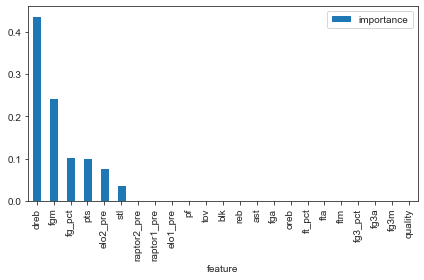

In [219]:
#Feature Importance for Pruned Tree
prunedimportances = clf_best_model.feature_importances_
feature_importance_pruned = pd.DataFrame({'feature': X_decisionTree_train.columns, 'importance': prunedimportances})
feature_importance_pruned = feature_importance_pruned.sort_values('importance', ascending = False)
ax = feature_importance_pruned.plot(kind = 'bar', x = 'feature')

plt.tight_layout()
plt.show()

In [220]:
#Accuracy Score of Full Decision Tree on Season 23
y_full_pred = full_clf.predict(newCelt23)
print(accuracy_score(celt23['wl'], y_full_pred))

#Accuracy Score of Pruned Decision Tree on Season 23
y_pruned_pred = clf_best_model.predict(newCelt23)
print(accuracy_score(celt23['wl'], y_pruned_pred))


0.6951219512195121
0.7926829268292683


<AxesSubplot:>

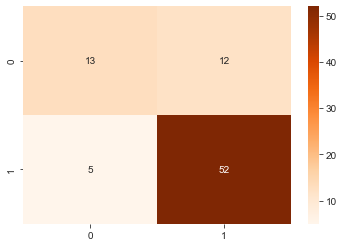

In [221]:
#Pruned Tree Confusion Matrix on Season 23
prunedcm = confusion_matrix(celt23['wl'], y_pruned_pred)
sns.heatmap(prunedcm, annot=True, cmap='Oranges')

# Random Forest

In [222]:
#Random Forest
X_rf = newdf
y_rf = df['wl_x']
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size = 0.3, random_state = 1, stratify = y_rf)

In [223]:
#Accuracy Score of Random Forest w/o Hypertuning
rf = RandomForestClassifier(n_estimators = 125, random_state = 1, criterion = "gini", n_jobs = -1)
rf.fit(X_rf_train, y_rf_train)
y_rf_pred = rf.predict(X_rf_test)
accuracy_score(y_rf_pred, y_rf_test)

0.7849462365591398

In [224]:
#Perform GridSearch for RandomForestClassifier
param_grid = {
    'n_estimators': [75, 100, 125],
    'criterion' :['gini', 'entropy', 'log_loss'],
    'random_state': [1],
    'n_jobs': [-1]
}

rf_gridSearch = GridSearchCV(RandomForestClassifier(), param_grid, cv = 10, scoring = 'accuracy')
rf_gridSearch.fit(X_rf_train, y_rf_train)

print('Best accuracy: ', rf_gridSearch.best_score_)
print('Parameter values to achieve best accuracy: ', rf_gridSearch.best_params_)

results_df = pd.DataFrame(rf_gridSearch.cv_results_)
results_df.transpose()

Best accuracy:  0.809090909090909
Parameter values to achieve best accuracy:  {'criterion': 'gini', 'n_estimators': 125, 'n_jobs': -1, 'random_state': 1}


,0,1,2,3,4,5,6,7,8
mean_fit_time,0.121605,0.130818,0.144289,0.100255,0.129536,0.138002,4.064512,4.295222,12.369736
std_fit_time,0.03172,0.018593,0.007038,0.005888,0.016538,0.013001,1.280052,0.159692,22.308712
mean_score_time,0.017699,0.019818,0.023886,0.016476,0.021369,0.022045,0.0,0.0,0.0
std_score_time,0.00412,0.000567,0.002,0.001897,0.003631,0.000584,0.0,0.0,0.0
param_criterion,gini,gini,gini,entropy,entropy,entropy,log_loss,log_loss,log_loss
param_n_estimators,75,100,125,75,100,125,75,100,125
param_n_jobs,-1,-1,-1,-1,-1,-1,-1,-1,-1
param_random_state,1,1,1,1,1,1,1,1,1
params,"{'criterion': 'gini', 'n_estimators': 75, 'n_j...","{'criterion': 'gini', 'n_estimators': 100, 'n_...","{'criterion': 'gini', 'n_estimators': 125, 'n_...","{'criterion': 'entropy', 'n_estimators': 75, '...","{'criterion': 'entropy', 'n_estimators': 100, ...","{'criterion': 'entropy', 'n_estimators': 125, ...","{'criterion': 'log_loss', 'n_estimators': 75, ...","{'criterion': 'log_loss', 'n_estimators': 100,...","{'criterion': 'log_loss', 'n_estimators': 125,..."
split0_test_score,0.818182,0.818182,0.818182,0.818182,0.818182,0.863636,NaN,NaN,NaN


In [225]:
#Accuracy Score of Hypertuned Random Forest w/o CV
rf_best_model = rf_gridSearch.best_estimator_
rf_best_model.fit(X_rf_train, y_rf_train)
y_best_pred = rf_best_model.predict(X_rf_test)
accuracy_score(y_rf_test, y_best_pred)

0.7849462365591398

In [226]:
#Accuracy Score of Hypertuned Random Forest with CV
hyperrf_accuracy_scores = cross_val_score(rf_best_model, X_rf_train, y_rf_train, cv = 10)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in hyperrf_accuracy_scores])
print('10-fold cross-validation mean accuracy:', round(hyperrf_accuracy_scores.mean(),4))

Accuracy scores of each fold:  ['0.818', '0.818', '0.909', '0.773', '0.773', '0.810', '0.810', '0.667', '0.857', '0.857']
10-fold cross-validation mean accuracy: 0.8091


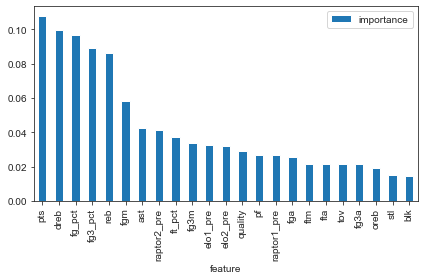

In [227]:
#Feature Importance for Random Forest
rf_importances = rf_best_model.feature_importances_
rf_feature_importances= pd.DataFrame({'feature': X_rf_train.columns, 'importance': rf_importances})
rf_feature_importances = rf_feature_importances.sort_values('importance', ascending = False)
ax = rf_feature_importances.plot(kind = 'bar', x = 'feature')

plt.tight_layout()
plt.show()

In [228]:
#Accuracy Score of Random Forest on Season 23 Data
y_best_pred = rf_best_model.predict(newCelt23)
accuracy_score(celt23['wl'], y_best_pred)

0.8292682926829268